<h1> Case SVM By: 
    Rizki Angga Pratama
    09011381823085

Support vector machines (SVM) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

Tahap 1: Import Paket

In [0]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

Tahap 2: Import Data CSV

In [3]:
# Read in muffin and cupcake ingredient data
recipes = ('recipes_muffins_cupcakes.csv')
recipes

'recipes_muffins_cupcakes.csv'

Tahap 3: Persiapan Data

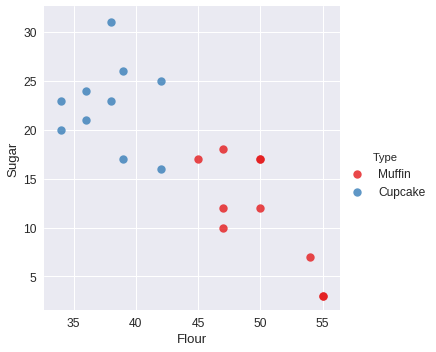

In [51]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [52]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

Tahap 4: Fit Model

In [53]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Tahap 5: Visualisasi Data

In [0]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

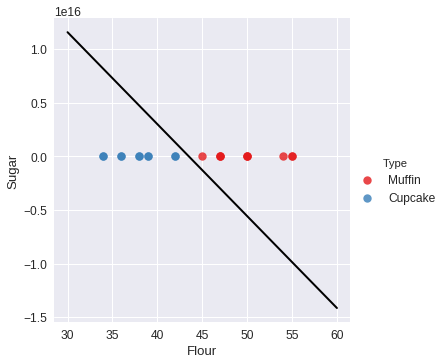

In [55]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

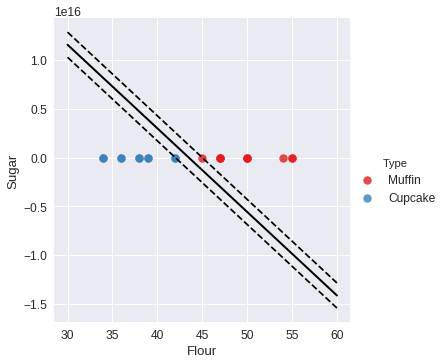

In [56]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

Tahap 6: Prediksi Untuk Kasus Baru

In [0]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [58]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


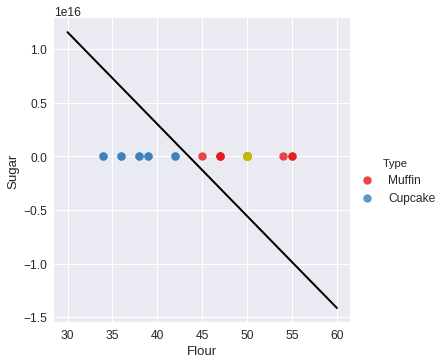

In [59]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [60]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [0]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [62]:
muffin_cupcake_dict

{'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt'],
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [0]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [64]:
# S = String
pickle.dumps(muffin_cupcake_dict)

"(dp0\nS'muffin_cupcake_features'\np1\n(lp2\nS'Flour'\np3\naS'Sugar'\np4\nasS'muffin_cupcake_model'\np5\nccopy_reg\n_reconstructor\np6\n(csklearn.svm.classes\nSVC\np7\nc__builtin__\nobject\np8\nNtp9\nRp10\n(dp11\nS'_impl'\np12\nS'c_svc'\np13\nsS'kernel'\np14\nS'linear'\np15\nsS'verbose'\np16\nI00\nsS'probability'\np17\nI00\nsS'classes_'\np18\ncnumpy.core.multiarray\n_reconstruct\np19\n(cnumpy\nndarray\np20\n(I0\ntp21\nS'b'\np22\ntp23\nRp24\n(I1\n(I2\ntp25\ncnumpy\ndtype\np26\n(S'i8'\np27\nI0\nI1\ntp28\nRp29\n(I3\nS'<'\np30\nNNNI-1\nI-1\nI0\ntp31\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np32\ntp33\nbsS'support_'\np34\ng19\n(g20\n(I0\ntp35\ng22\ntp36\nRp37\n(I1\n(I3\ntp38\ng26\n(S'i4'\np39\nI0\nI1\ntp40\nRp41\n(I3\nS'<'\np42\nNNNI-1\nI-1\nI0\ntp43\nbI00\nS'\\x03\\x00\\x00\\x00\\x0b\\x00\\x00\\x00\\x0f\\x00\\x00\\x00'\np44\ntp45\nbsS'dual_coef_'\np46\ng19\n(g20\n(I0\ntp47\ng22\ntp48\nRp49\n(I1\n(I1\nI3\ntp50\ng26\n(S'f8'\np51\nI0\nI1\ntp52

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp7fb2vadl/pubring.gpg' created
gpg: /tmp/tmp7fb2vadl/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
